# Diabetese Prediction

# <p style="background-color:#6b5b95; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ⚛ Dataset Explanation ⚛</p>

<div style="border-radius:10px;
            border : black solid;
            background-color: #5b9aa0;
            font-size:100%;
            text-align: left">
    
<h2 style='; border:0; border-radius: 15px; font-weight: bold; font-size:220%; color:white'><center> Explanation of the Variables </center></h2> 
    
* ****Pregnancies:**** Number of times pregnant
* ****Glucose:**** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* ****Blood Pressure:**** Diastolic blood pressure (mm Hg)
* ****SkinThickness:**** Triceps skin fold thickness (mm)
* ****Insulin:**** 2-Hour serum insulin (mu U/ml)
* ****DiabetsPedigreeFunction:**** A function that calculates the probability of having diabetes according to one's descendants
* ****BMI:**** Body mass index (weight in kg/(height in m)^2)
* ****Age:**** Age (years)
* ****Outcome:**** Class variable (0 or 1)

# Notebook Content

*Import Libraries* 

*Load and Check Data*

*Exploratory Data Analysis*

*Data Preprocessing* 

*Models* 

#Import Libraries 

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Classic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Advanced Visualization Libraries
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True) #enables plotly plots to be displayed in notebook
cmap1 = "gist_gray"

#Models

from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

#Metrics, Preprocessing and Tuning Tools
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from scikitplot.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import missingno as msno
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

#Customization
import warnings
warnings.filterwarnings("ignore")
from termcolor import colored

In [ ]:
!pip install --upgrade seaborn
!pip install --upgrade matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


 # Load and Check Data

In [ ]:
diabetes = pd.read_csv("Diabetes.csv")
df = diabetes.copy()

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
def check_data(df):
    print(80 * "*")
    print('DIMENSION: ({}, {})'.format(df.shape[0], df.shape[1]))
    print(80 * "*")
    print("COLUMNS:\n")
    print(df.columns.values)
    print(80 * "*")
    print("DATA INFO:\n")
    print(df.dtypes)
    print(80 * "*")
    print("MISSING VALUES:\n")
    print(df.isnull().sum())
    print(80 * "*")
    print("NUMBER OF UNIQUE VALUES:\n")
    print(df.nunique())
    
check_data(df)

********************************************************************************
DIMENSION: (768, 9)
********************************************************************************
COLUMNS:

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']
********************************************************************************
DATA INFO:

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
********************************************************************************
MISSING VALUES:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI        

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(" RESULT ".center(50, "-"))
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    print("".center(50, "-"))
    
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

--------------------- RESULT ---------------------
Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1
--------------------------------------------------


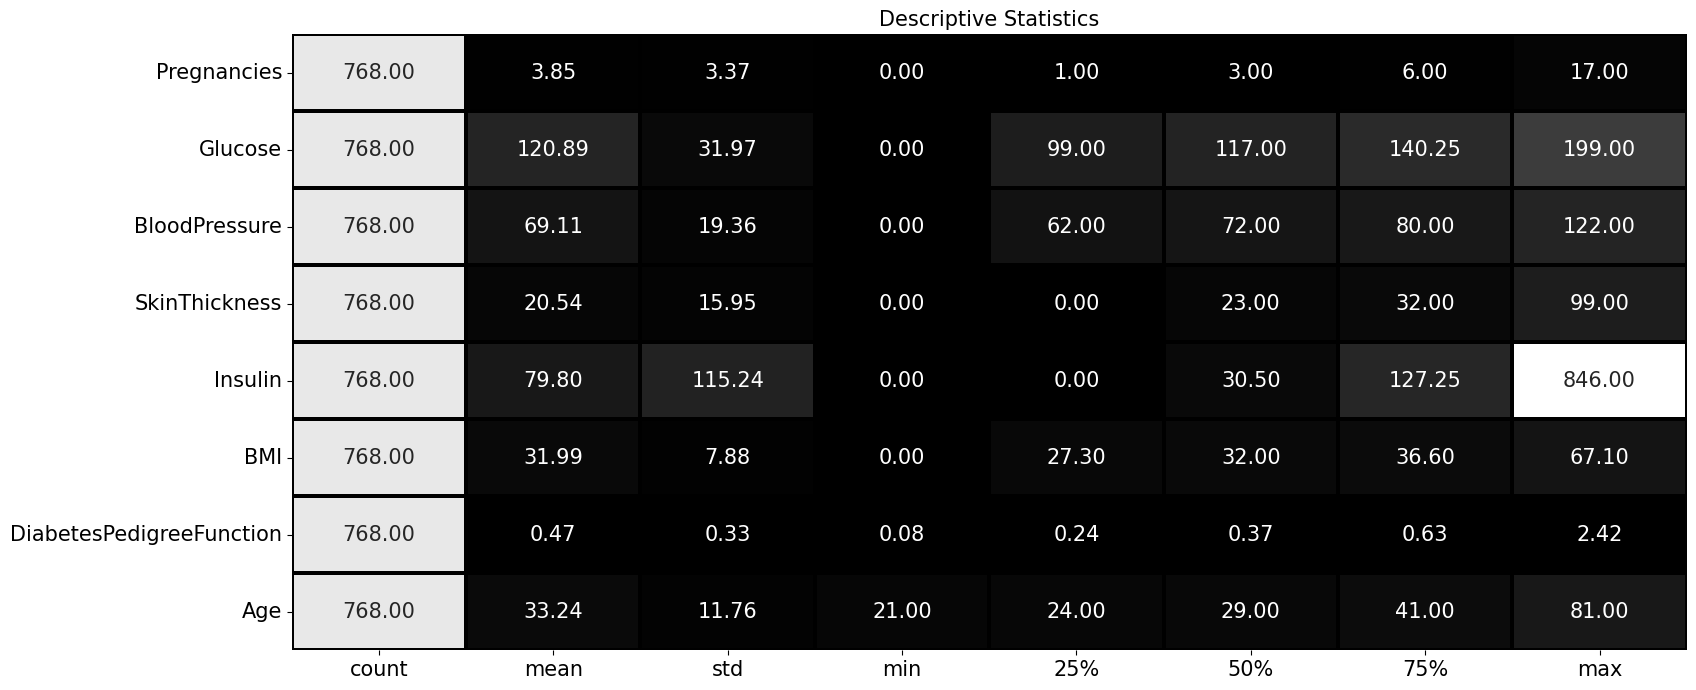

In [ ]:
def descriptive_stats(df):
    desc = df.describe().T
    desc_df = pd.DataFrame(index = df. columns,
                          columns = desc.columns,
                          data = desc)
    f, ax = plt.subplots(figsize = (18, 8))
    sns.heatmap(desc,
               annot = True,
               cmap = cmap1,
               fmt = ".2f",
               ax = ax,
               linecolor = "black",
               linewidths = 1.5,
               cbar = False,
               annot_kws = {"size" : 15})
    plt.xticks(size = 15)
    plt.yticks(size = 15, rotation = 0)
    plt.title("Descriptive Statistics", size = 15)
    plt.show()
    
   
descriptive_stats(df[num_cols])

<div style="border-radius:10px;
            border : black solid;
            background-color: #5b9aa0;
            font-size:100%;
            text-align: left">
    
<h2 style='; border:0; border-radius: 15px; font-weight: bold; font-size:220%; color:white'><center> Summary of the Dataset </center></h2> 
    
 * <b> The dataset consists of 768 rows and 8 columns </b>
 * <b> The target variable is Outcome, which contains categorical binary values 0 and 1 </b>
 * <b> The variables other than Outcome are numerical </b> 
 * <b> There are technically no missing values because of lack NaN values, however when we examine closely, some 0's in the dataset indicate they are actually missing values </b>
 * <b> Descriptive statistics show that some features may have outliers (for example, 17 pregnancies can be an outlier) </b>

Here, we first checked the structure of the dataset to find out its dimensions, categorical and numerical values and if there are missing values or not. Then we split data into two groups: categorical and numerical values. In the next step, we calculated descriptive statistics to grasp the story of data better. As a result, we made deductions from them and summarized our findings.

As you can realize, we used functions for these operations instead of one-time codes. This approach is called <b> functional data analysis </b>, which aims to automate analysis processes and decrease coding time. 

 ## Exploratory Data Analysis (EDA) 

In [ ]:
import matplotlib.pyplot as plt

def tar_var_summary(df, tar_var):
    colors = ['#a2b9bc', '#6b5b95', '#b2ad7f', '#feb236', '#b5e7a0', '#878f99',
              '#d64161', '#86af49', '#ff7b25']
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Add the countplot to the left subplot
    x = df[tar_var].value_counts().index
    y = df[tar_var].value_counts().values
    ax[0].bar(x, y, color=colors, edgecolor='black', linewidth=2)
    ax[0].set_title('Countplot')
    ax[0].set_xlabel(tar_var)
    ax[0].set_ylabel('Count')

    # Add the pie chart to the right subplot
    labels = df[tar_var].value_counts().keys()
    values = df[tar_var].value_counts().values
    explode = (0, 0.25)
    ax[1].pie(values, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
    ax[1].set_title('Percentages')

    fig.suptitle('Distribution of the Target Variable', fontsize=16, y=0.95)
    plt.show()


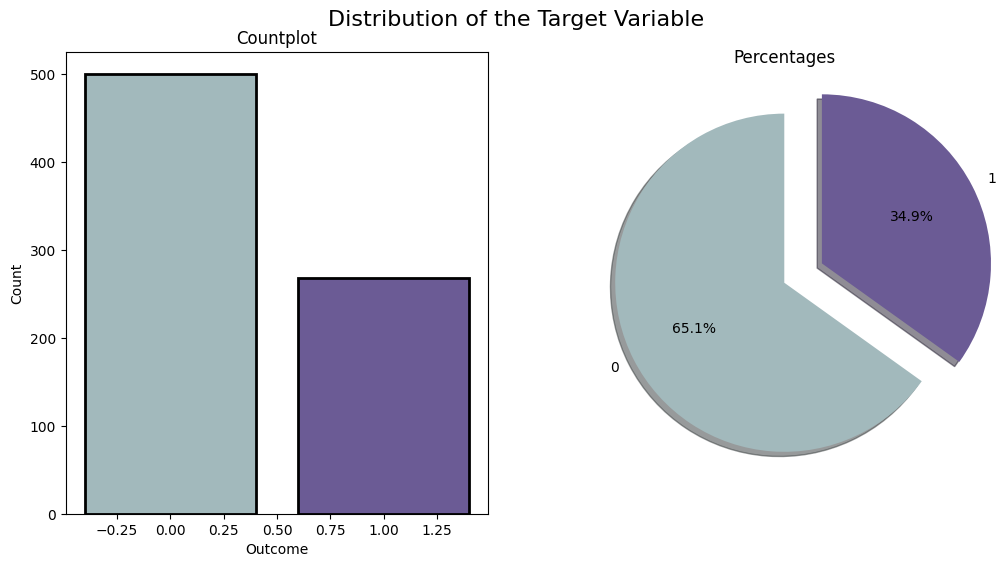

In [ ]:
tar_var_summary(df, "Outcome")

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm

def num_var_summary(df, num_var):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Add the boxplot to the left subplot
    ax[0].boxplot(df[num_var], notch=False, vert=True, widths=0.5)
    ax[0].set_title('Quantiles')
    ax[0].set_ylabel(num_var)

    # Add the normal distribution curve to the right subplot
    x_range = np.linspace(df[num_var].min(), df[num_var].max(), 100)
    y_range = norm.pdf(x_range, loc=df[num_var].mean(), scale=df[num_var].std())
    ax[1].plot(x_range, y_range, color='blue', linewidth=3)
    ax[1].hist(df[num_var], bins=30, density=True, alpha=0.6, color='#A6D0DD', edgecolor='#DBE6EC')
    ax[1].set_title('Distribution')
    ax[1].set_xlabel(num_var)

    fig.suptitle(num_var.capitalize(), fontsize=16, y=0.95)
    plt.show()


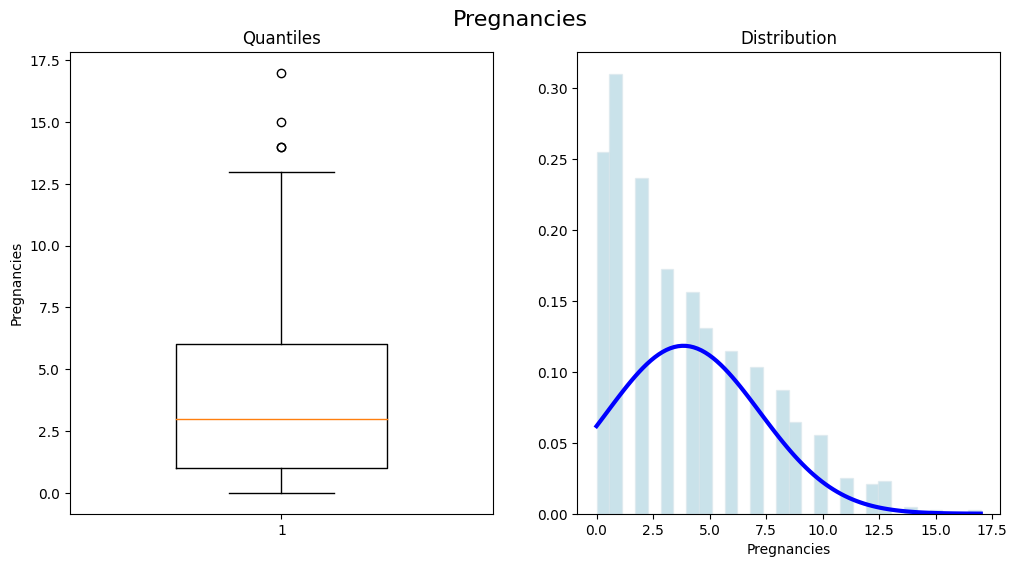

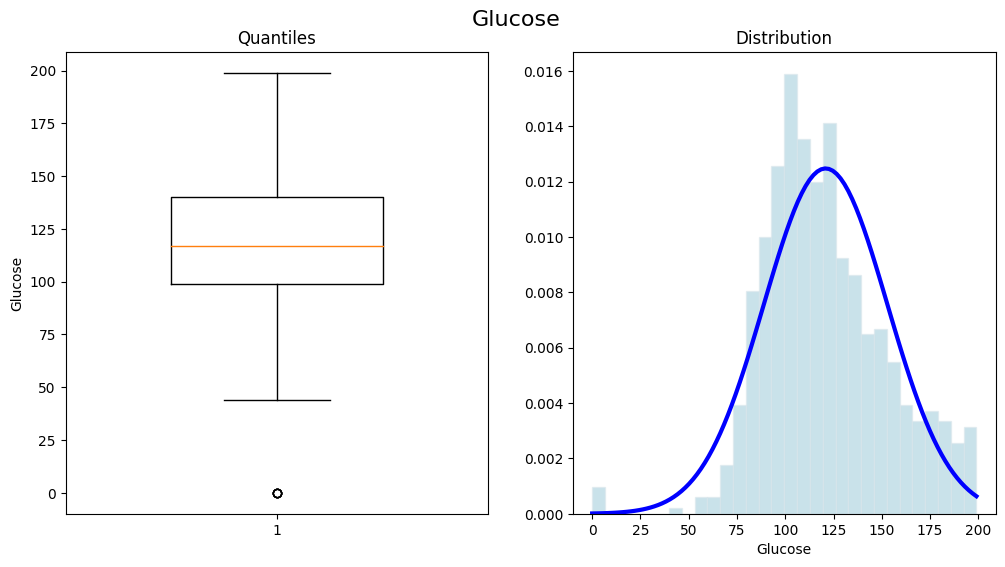

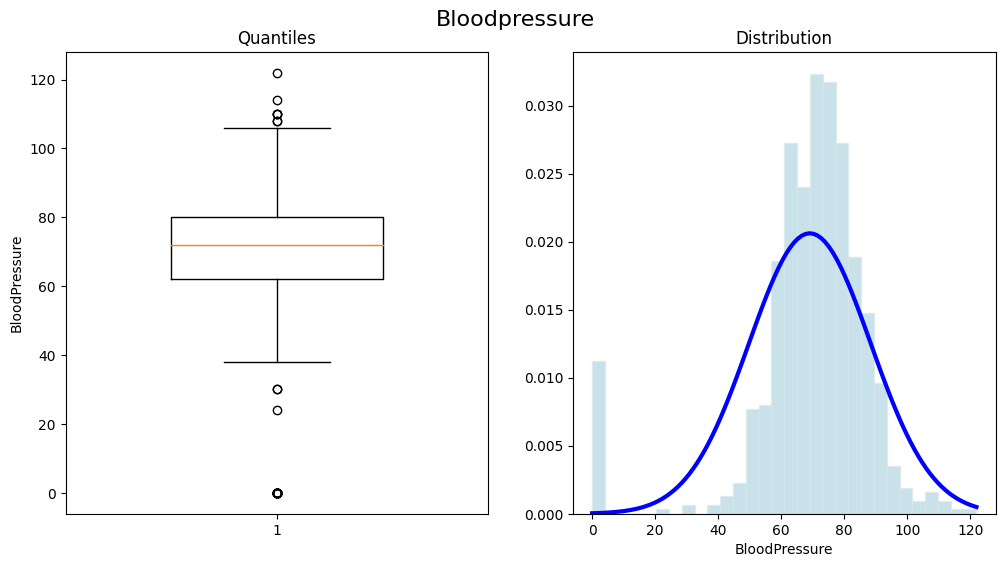

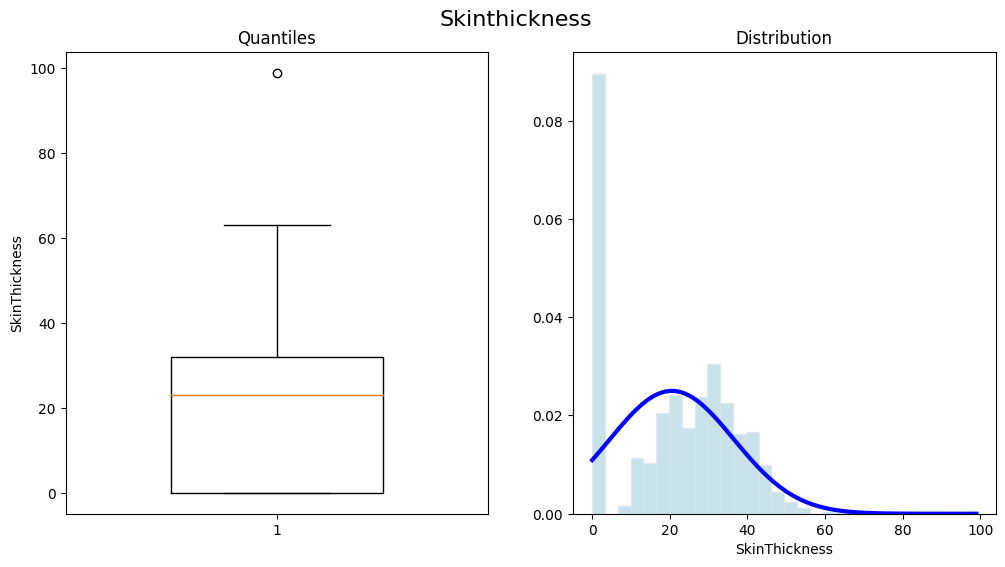

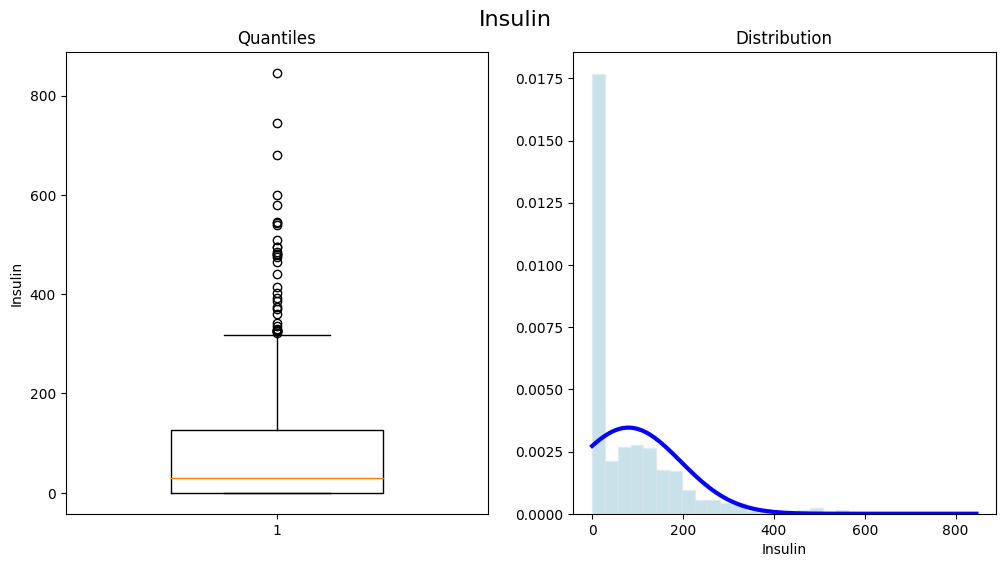

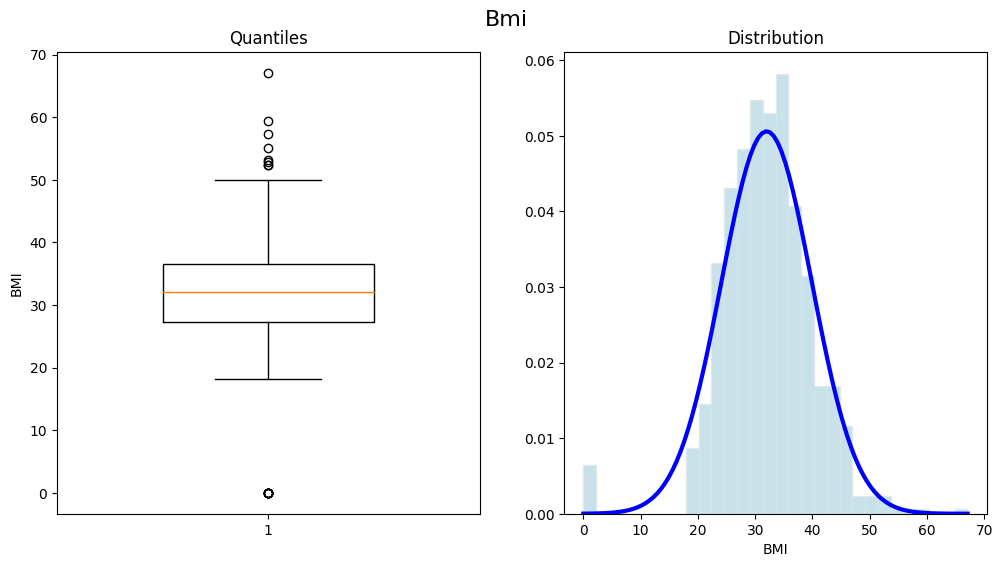

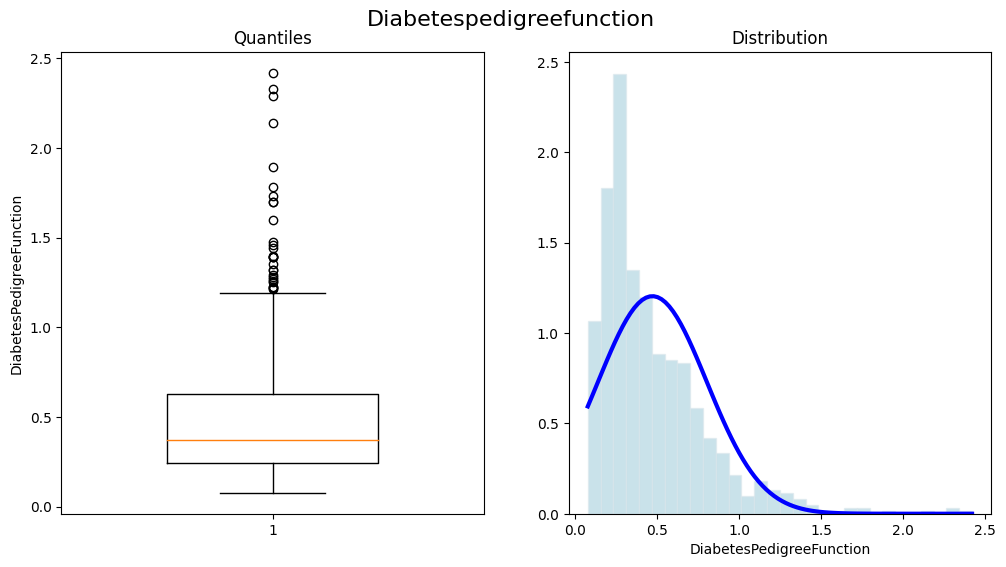

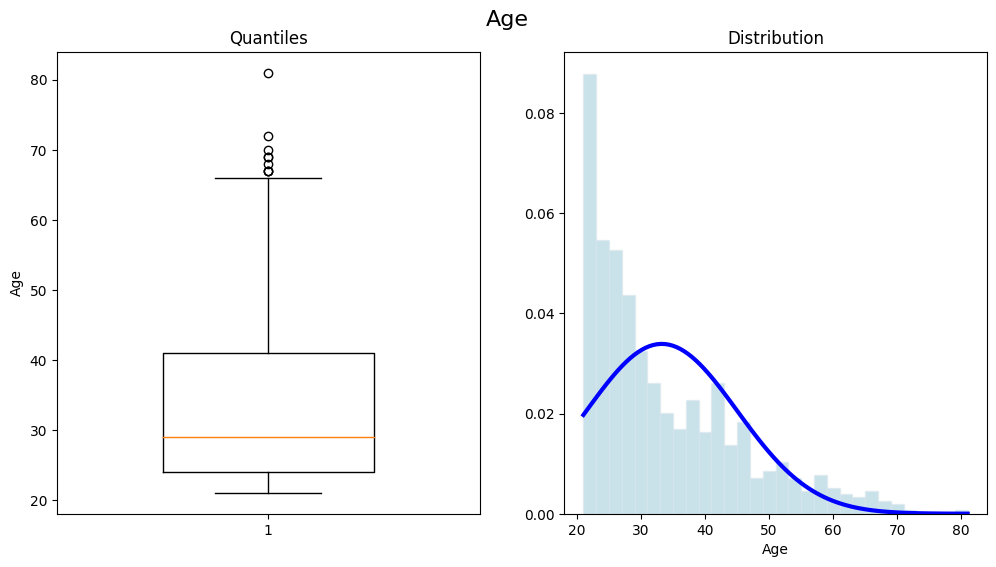

In [ ]:
for i in num_cols:
    num_var_summary(df, i)

In [ ]:
import matplotlib.pyplot as plt

def num_features(df, num_var, tar_var):
    x0 = df[df[tar_var]==0][num_var]
    x1 = df[df[tar_var]==1][num_var]
    
    fig, ax = plt.subplots()
    ax.hist(x0, color="#0A4D68", alpha=0.75, label="0")
    ax.hist(x1, color="#A6D0DD", alpha=0.75, label="1")
    
    ax.set_title(num_var)
    ax.set_xlabel("Value")
    ax.set_ylabel("Count")
    ax.legend()
    
    plt.show()


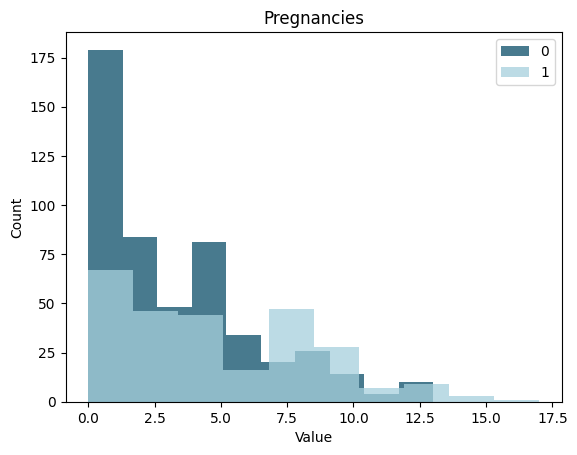

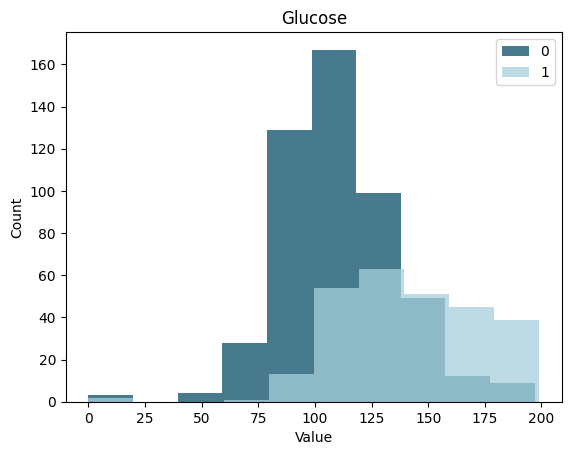

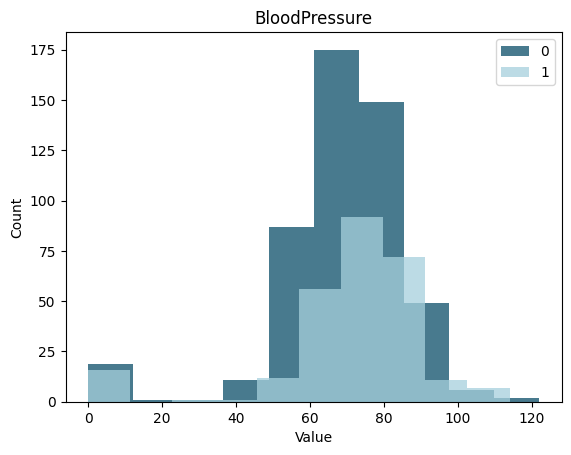

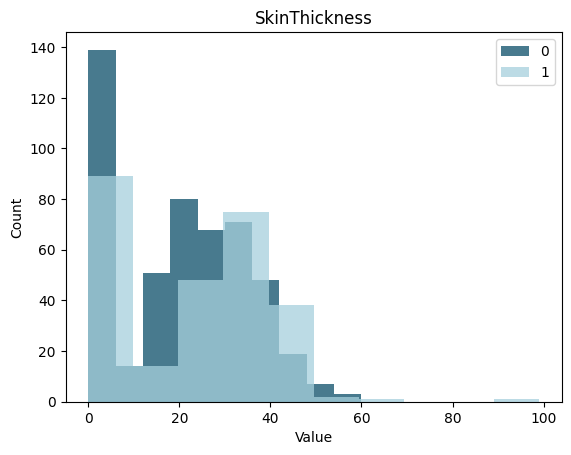

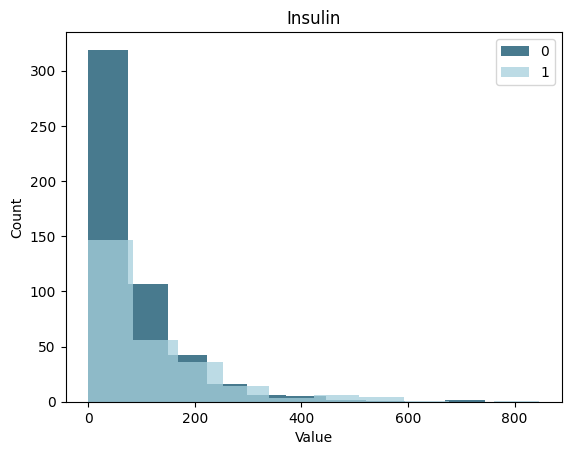

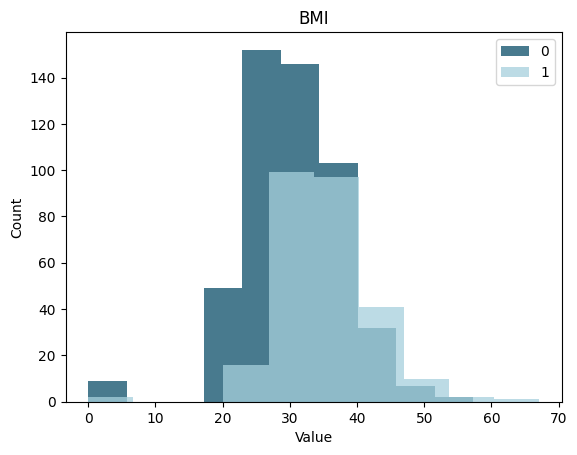

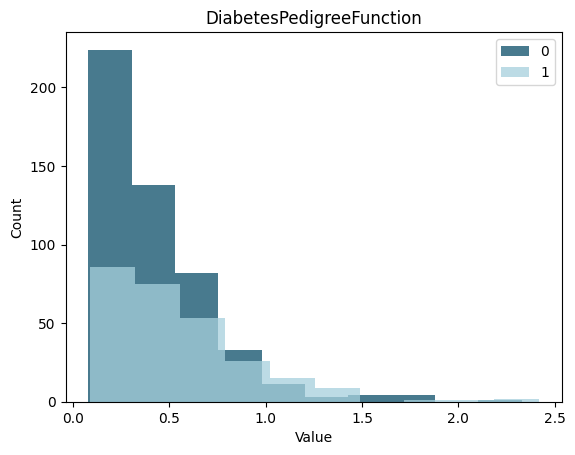

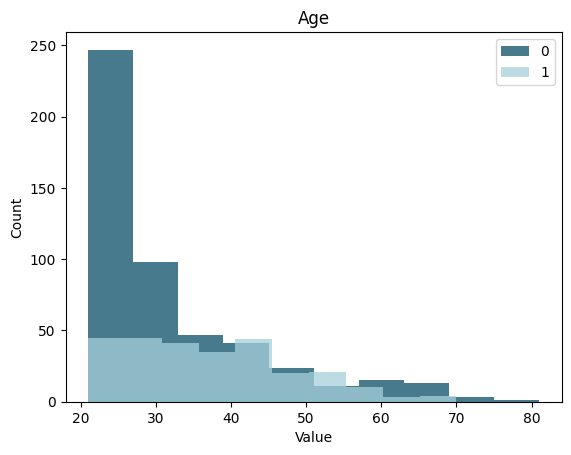

In [ ]:
for i in num_cols:
    num_features(df, i, "Outcome")

In [ ]:
def df_corr(df):
    plt.figure(figsize = (12,10))
    corr = df.corr()
    matrix = np.triu(corr)
    sns.heatmap(corr, annot = True, mask = matrix, cmap = "gist_gray")

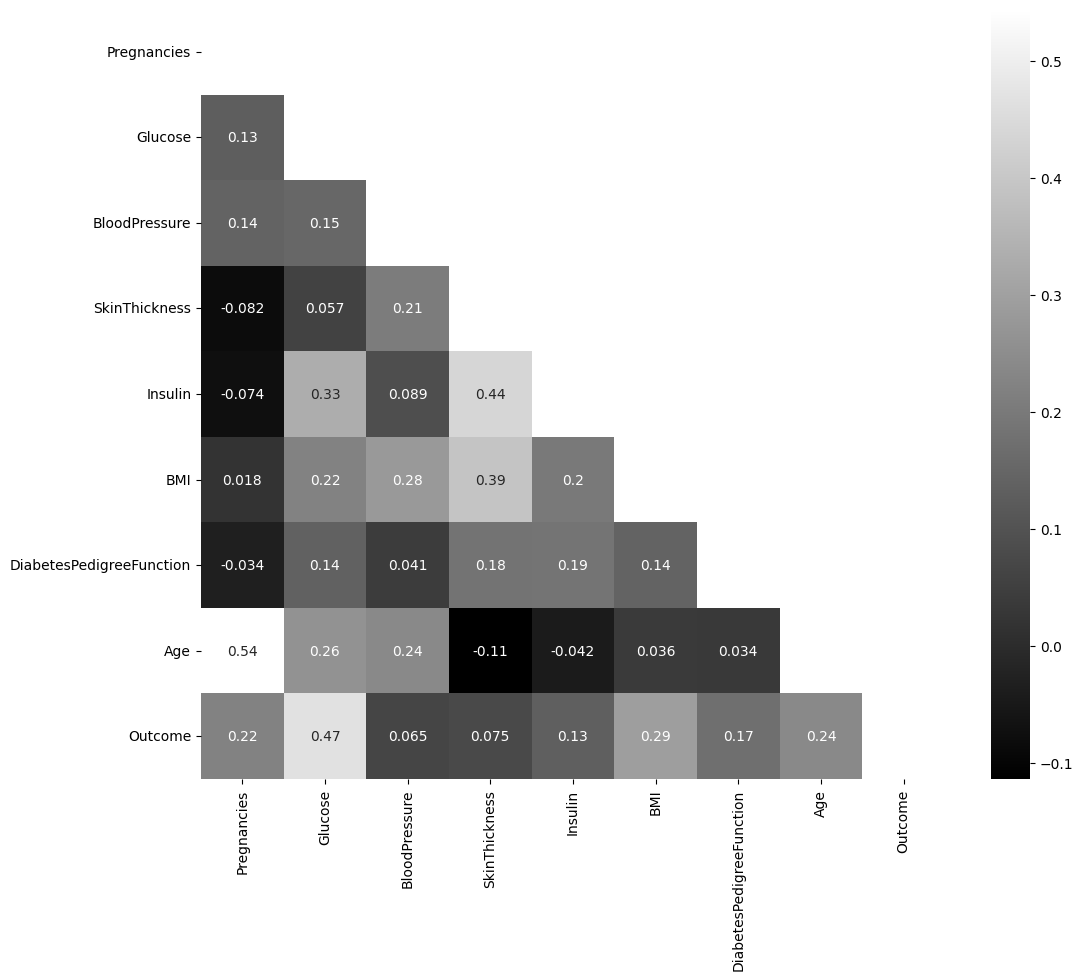

In [ ]:
df_corr(df)

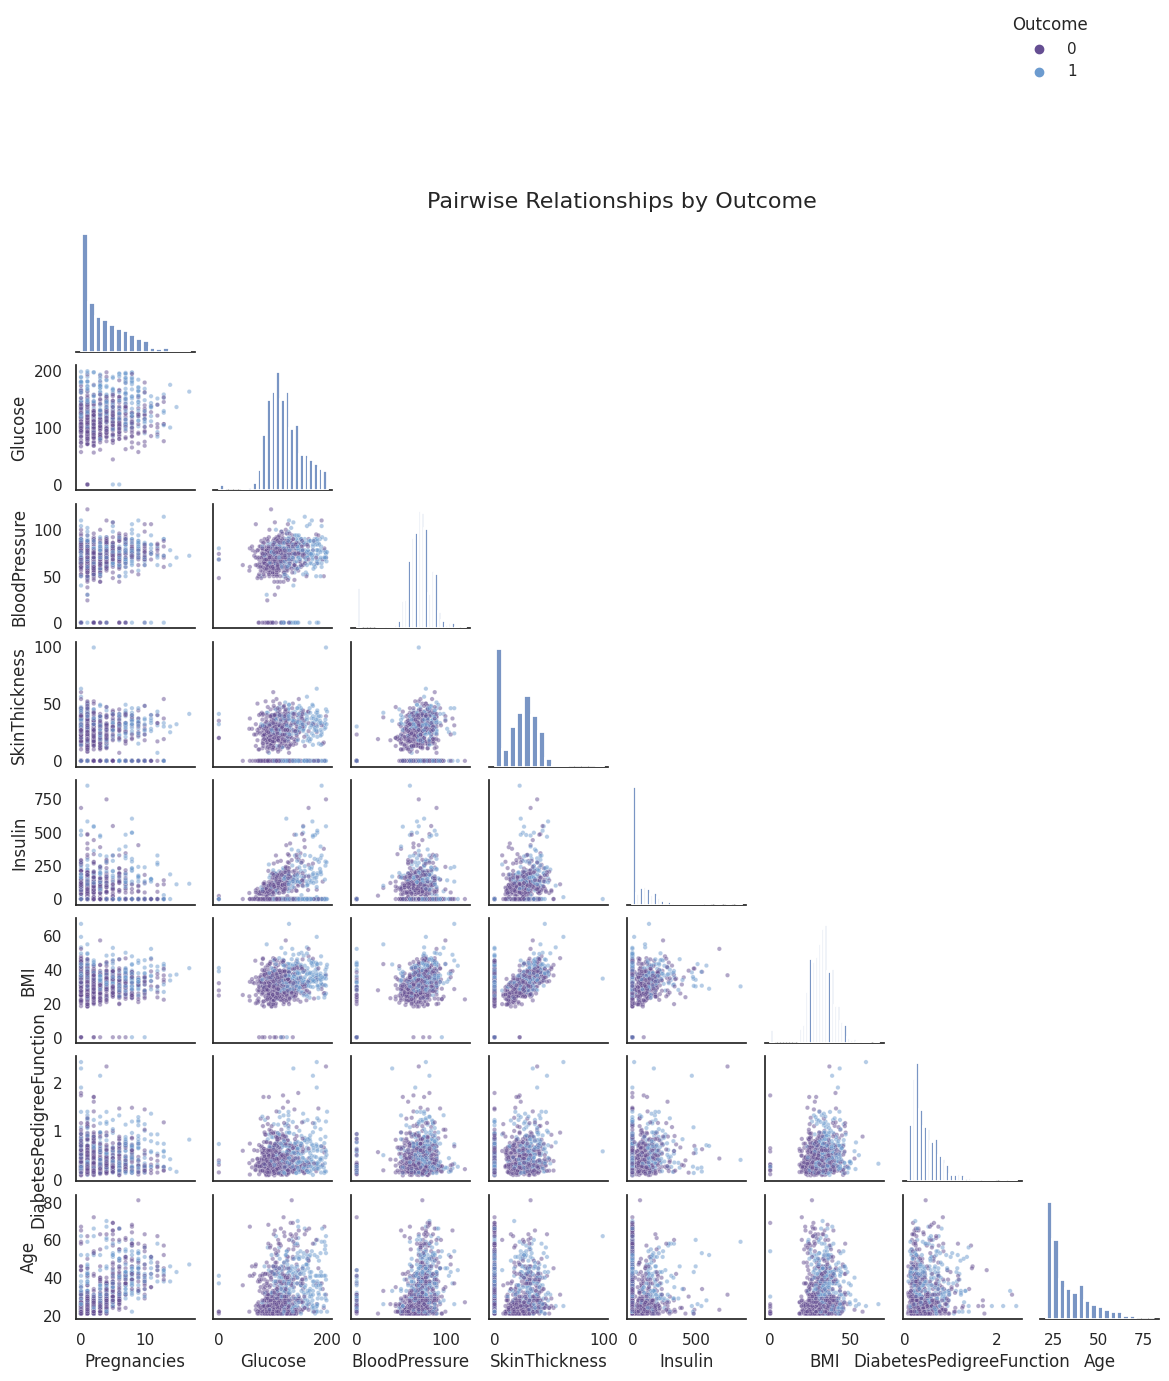

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#654E92', '#6C9BCF', '#A5C0DD', '#EBD8B2']

# Set plot style
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create scatter plot matrix using seaborn's PairGrid
g = sns.PairGrid(df[num_cols].select_dtypes(include=['int', 'float']), 
                 diag_sharey=False, 
                 corner=True)

# Add scatter plot to off-diagonal subplots and histogram to diagonal subplots
g.map_upper(sns.scatterplot, s=10, alpha=0.5, hue=df['Outcome'], palette=colors)
g.map_lower(sns.scatterplot, s=10, alpha=0.5, hue=df['Outcome'], palette=colors)
g.map_diag(sns.histplot, linewidth=2, alpha=0.75)

# Add legend
g.add_legend(title='Outcome', bbox_to_anchor=(0.9, 1.1))

# Set plot title and dimensions
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Pairwise Relationships by Outcome', fontsize=16)
g.fig.set_size_inches(12, 12)

# Show plot
plt.show()



The outcome in this code refers to a categorical variable in the dataset that indicates the outcome of interest. The code creates a scatterplot matrix (also known as a pairs plot or SPLOM) where the scatterplots in the off-diagonal subplots are colored according to the levels of the outcome variable, allowing us to visualize the pairwise relationships between the numerical variables in the dataset and how they relate to the outcome of interest

In [ ]:
def detect_outliers(df, num_var):
    fig, ax = plt.subplots(figsize=(8, 4))
    
    sns.boxplot(x=num_var, data=df, ax=ax)
    sns.swarmplot(x=num_var, data=df, color=".25", ax=ax)
    
    ax.set_title("{} Outliers".format(num_var))
    plt.show()


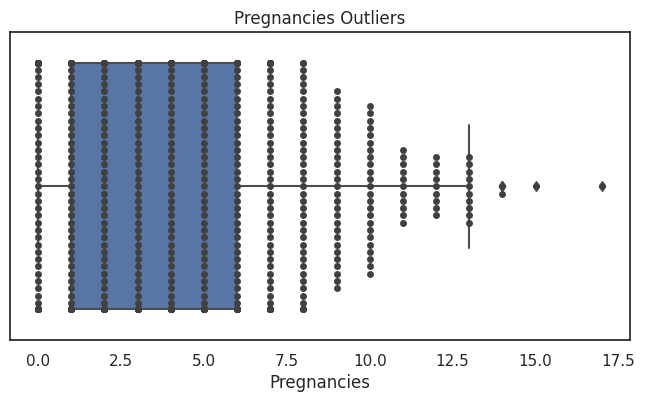

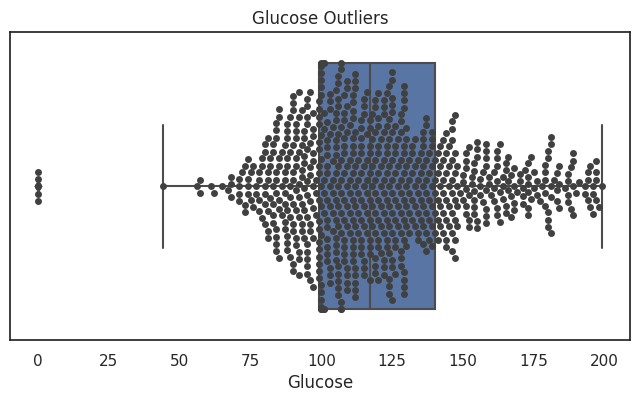

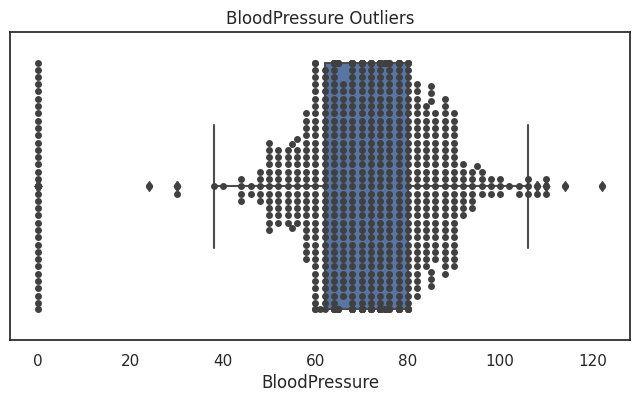

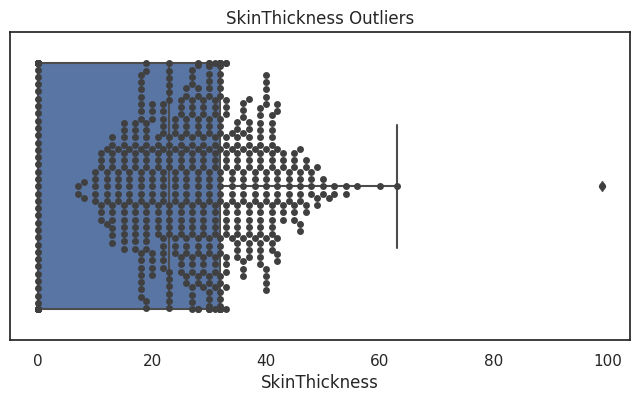

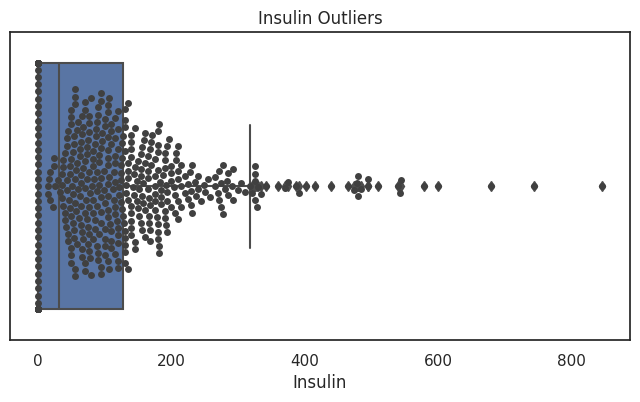

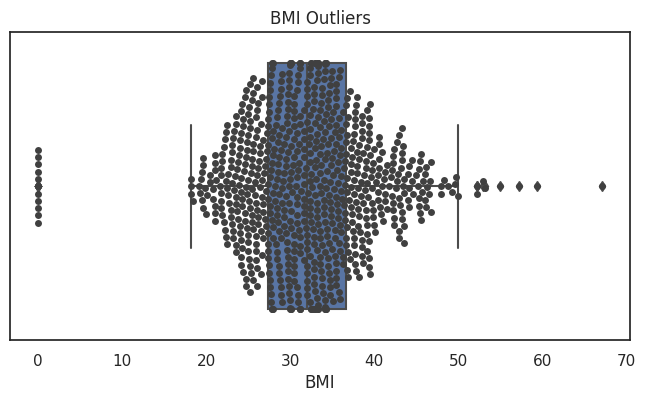

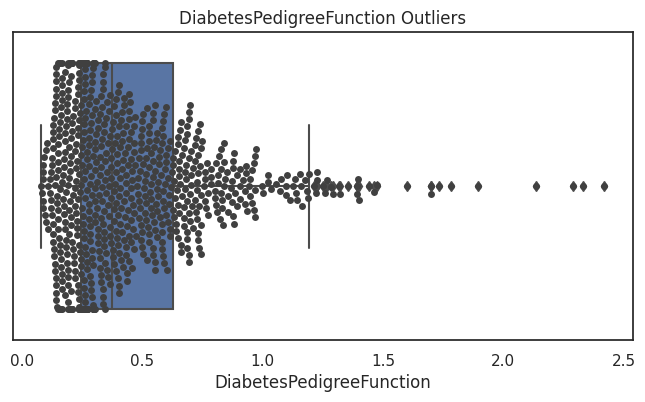

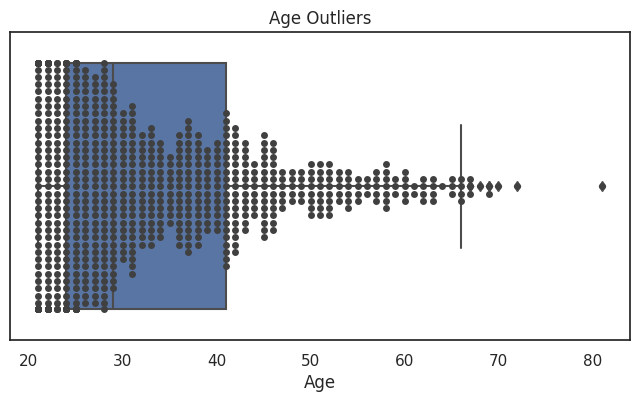

In [ ]:
for col in num_cols:
    detect_outliers(df, col)


In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<div style="border-radius:10px;
            border : black solid;
            background-color: #5b9aa0;
            font-size:100%;
            text-align: left">
    
<h2 style='; border:0; border-radius: 15px; font-weight: bold; font-size:220%; color:white'><center> Observations from Exploratory Data Analysis </center></h2> 
    
 * <b> There are no highly correlated independent variables. </b>
 * <b> The presence of outliers that can affect the models draw attention. </b>
 * <b> Despite the fact that some values like Glucose, BMI etc. that can't have the value 0, we see that these features contain 0's. So, we should handle them in the feature engineering step. </b>

**Data Preprocessing** 

This step includes filling missing values, outlier detection and removal, feature engineering, scaling and splitting data. 

As you know, missing values and outliers have always the potential to directly affect the model. Since this may lead to undesired consequences, we should handle them in a correct way. 

Even though there are many methods all of which are useful to some degree case by case, a common approach to handle missing values is filling them with unbiased statistics like mode, mean or median. Because removal of them means loss of information and imputation methods bring the possibility of changing the distribution of features. 

As for outliers, the initial action is to detect them. Then we need to examine them carefully and determine if they affect the model or not. Analysts generally tend to keep them in the dataset, because removing them can lead to loss of information, which is an awful thing for the accuracy of models. However, if they contain extreme values, then removal of the outliers can be taken into account.



In [ ]:
missing_values = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[missing_values] = np.where(df[missing_values] == 0, np.nan, df[missing_values])

<Axes: >

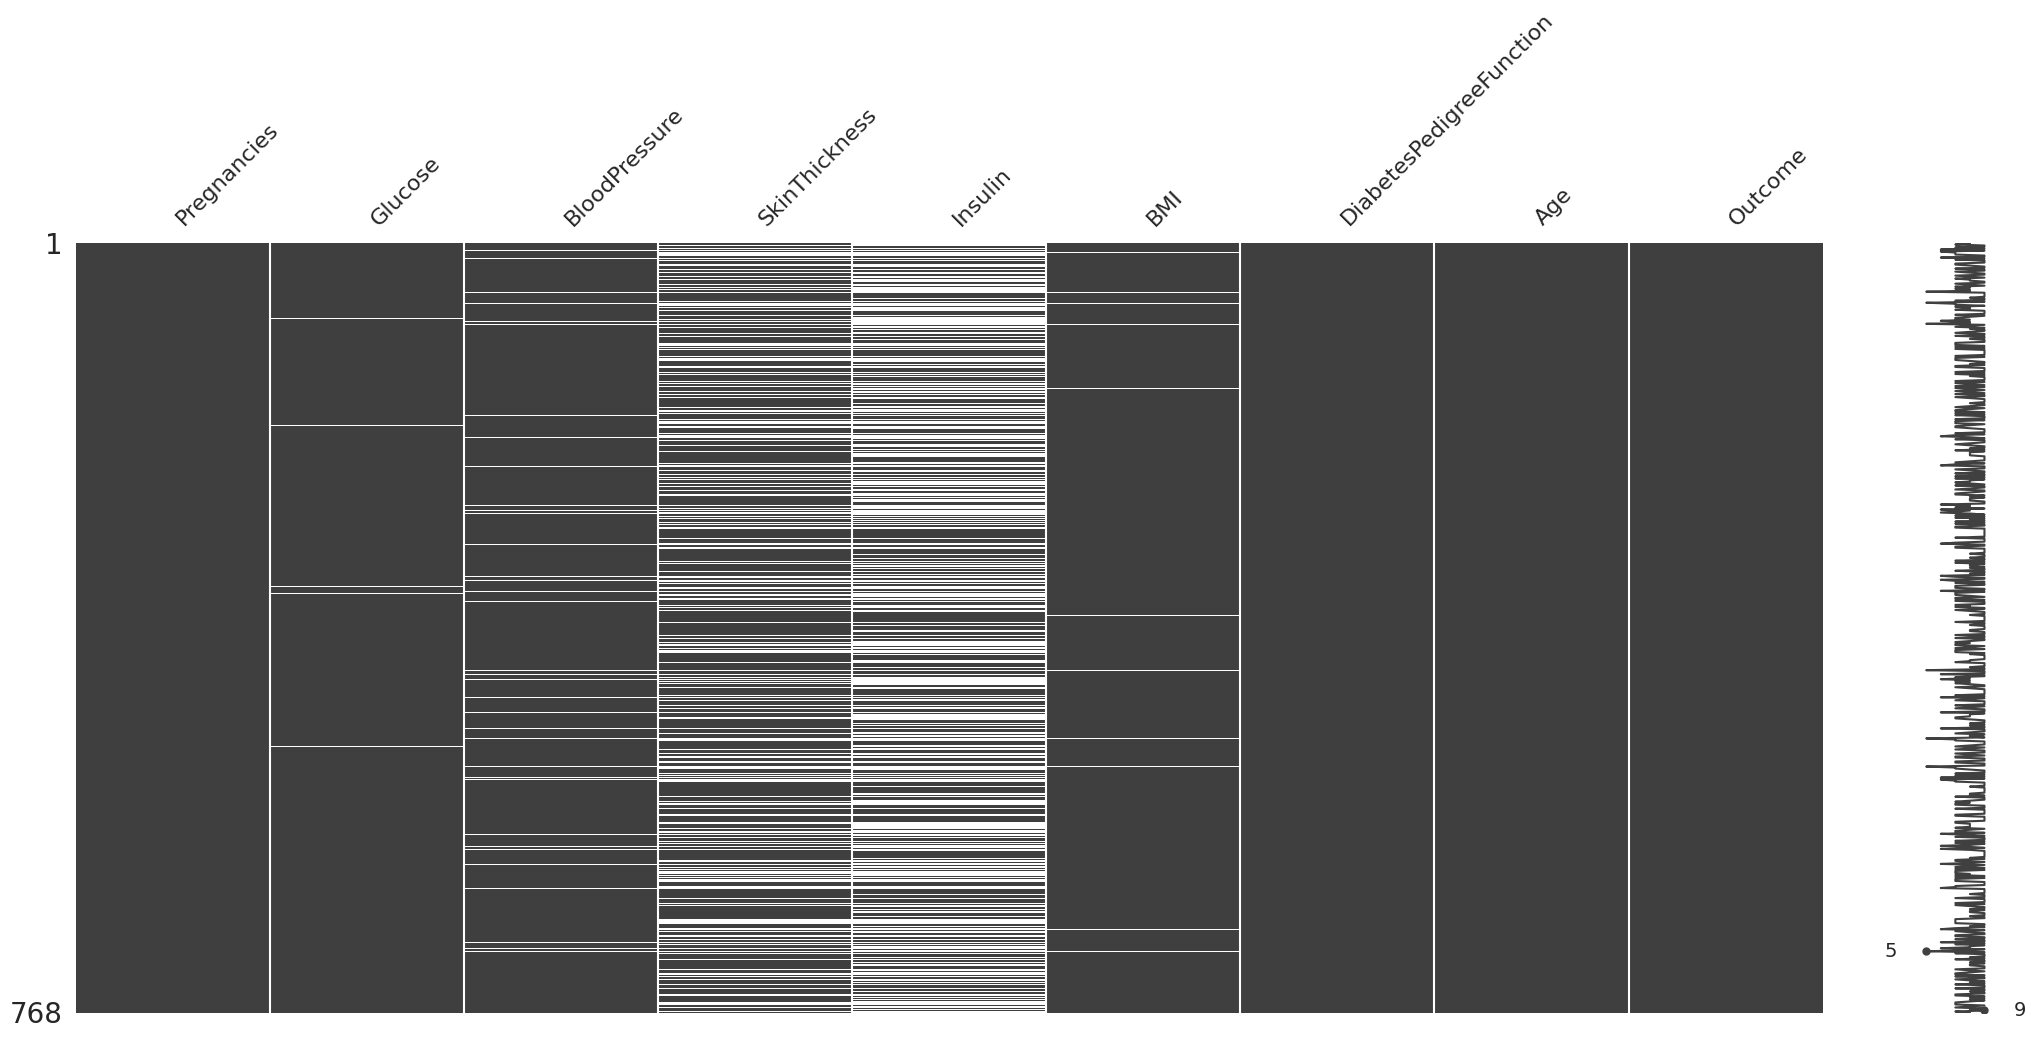

In [ ]:
msno.matrix(df)

In [ ]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [ ]:
missing_percentage(df)

,Total,Percent
Insulin,374,48.70
SkinThickness,227,29.56
BloodPressure,35,4.56
BMI,11,1.43
Glucose,5,0.65


In [ ]:
df.loc[df.Age.between(18,31), "AgeGroup"] = "Young"
df.loc[df.Age.between(31,46), "AgeGroup"] = "MiddleAge"
df.loc[df.Age.between(46,66), "AgeGroup"] = "LateMiddleAge"
df.loc[df.Age >= 66,"AgeGroup"] = "Old"

In [ ]:
df['Insulin'] = df['Insulin'].fillna(df.groupby(["AgeGroup", "Outcome"])['Insulin'].transform('median'))
df['Insulin'] = df['Insulin'].fillna(df.groupby('Outcome')['Insulin'].transform('median')) 
df['SkinThickness'] = df['SkinThickness'].fillna(df.groupby('Outcome')['SkinThickness'].transform('median'))  
df["BloodPressure"] = df["BloodPressure"].fillna(df.groupby("Outcome")["BloodPressure"].transform('median'))
df['BMI'] = df['BMI'].fillna(df.groupby(["AgeGroup", "Outcome"])['BMI'].transform('median'))
df["Glucose"] = df["Glucose"].fillna(df.groupby("Outcome")["Glucose"].transform('median'))

In [ ]:
df.loc[df.BMI < 18.5, "BMIClass"] = "Underweight"
df.loc[df.BMI.between(18.5, 25.0), "BMIClass"] = "Normal"
df.loc[df.BMI.between(25.0, 30.0), "BMIClass"] = "Overweight"
df.loc[df.BMI.between(30.0, 35.0), "BMIClass"] = "Obese"
df.loc[df.BMI >= 35.0 , "BMIClass"] = "ExtremelyObese"

df.loc[df.Insulin < 120  , 'InsulinThreshold'] ="Below"
df.loc[df.Insulin >= 120 , 'InsulinThreshold'] ="Above"

df.loc[df.Pregnancies > 0, "HasChild"] = "Yes"
df.loc[df.Pregnancies == 0, "HasChild"] = "No"

df.loc[df.BMI < 30, "IsObese"] = "No"
df.loc[df.BMI >= 30, "IsObese"] = "Yes"

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMIClass,InsulinThreshold,HasChild,IsObese
0,6,148.0,72.0,35.0,199.5,33.6,0.627,50,1,LateMiddleAge,Obese,Above,Yes,Yes
1,1,85.0,66.0,29.0,115.0,26.6,0.351,31,0,MiddleAge,Overweight,Below,Yes,No
2,8,183.0,64.0,32.0,168.0,23.3,0.672,32,1,MiddleAge,Normal,Above,Yes,No
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Young,Overweight,Below,Yes,No
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,MiddleAge,ExtremelyObese,Above,No,Yes


In [ ]:
def outlier_thresholds(dataframe, col_name, q1 = 0.25, q3 = 0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable, q1 = 0.25, q3 = 0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1 = q1, q3 = q3)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
for col in df[num_cols].columns:
    replace_with_thresholds(df, col, q1 = 0.1, q3 = 0.9)

In [ ]:
import matplotlib.pyplot as plt

def cat_var_summary(df, cat_var):
    colors = ['#a2b9bc', '#6b5b95', '#b2ad7f', '#feb236', '#b5e7a0', '#878f99',
              '#d64161', '#86af49', '#ff7b25']
    
    # create subplots with countplot and pie chart
    fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

    # set x-axis tick label rotation to 70 degrees
    ax[0].tick_params(axis='x', rotation=70)
    
    # countplot
    sns.countplot(x=cat_var, data=df, palette=colors, ax=ax[0])
    ax[0].set_title('Countplot')
    ax[0].set_xlabel(cat_var)
    ax[0].set_ylabel('Count')
    
    
    # pie chart
    counts = df[cat_var].value_counts()
    ax[1].pie(counts.values, labels=counts.index, colors=colors,
              autopct='%1.1f%%', startangle=90, pctdistance=0.85,
              textprops={'fontsize': 12, 'color': 'w', 'weight': 'bold'})
    ax[1].set_title('Percentages')
    
    # adjust layout and show plot
    fig.suptitle(cat_var, fontsize=16, y=0.95)
    plt.subplots_adjust(wspace=0.5)
    plt.show()


In [ ]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'AgeGroup',
       'BMIClass', 'InsulinThreshold', 'HasChild', 'IsObese'],
      dtype='object')

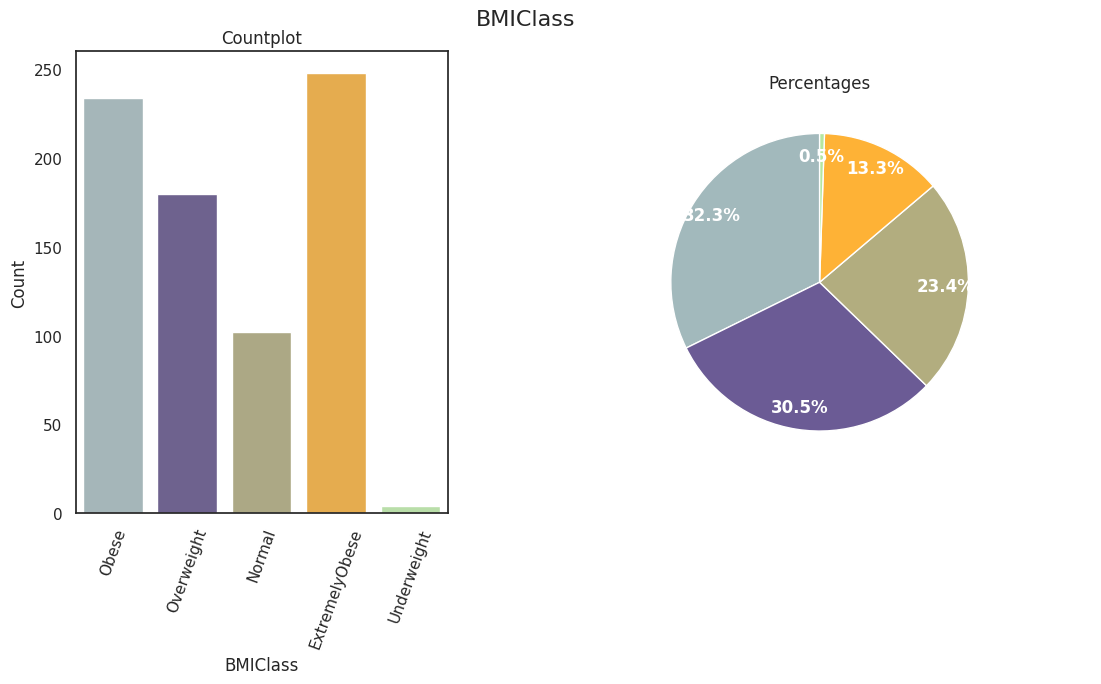

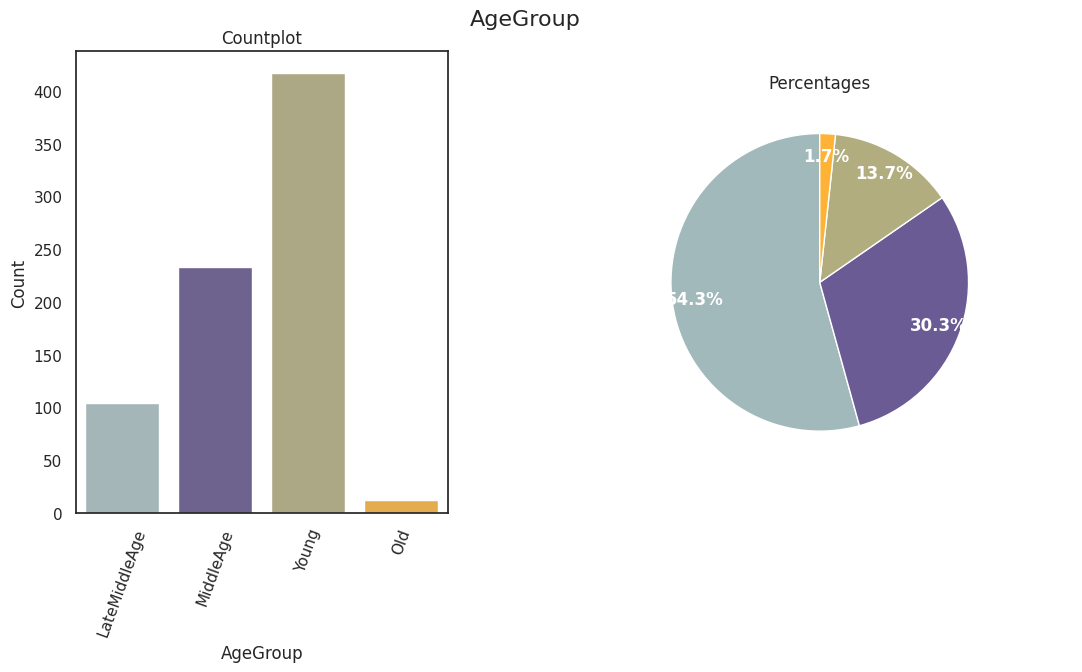

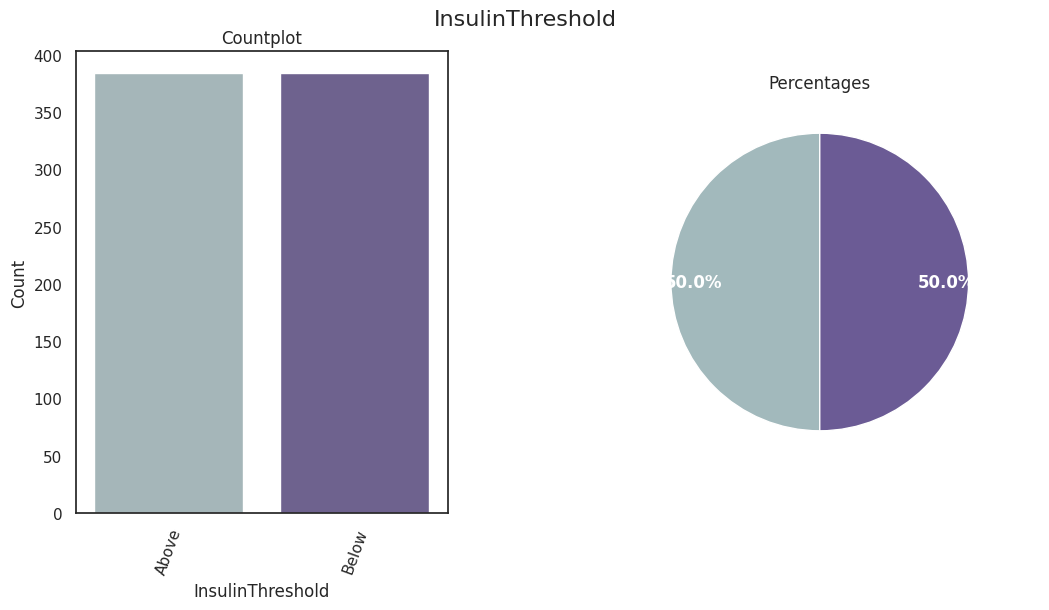

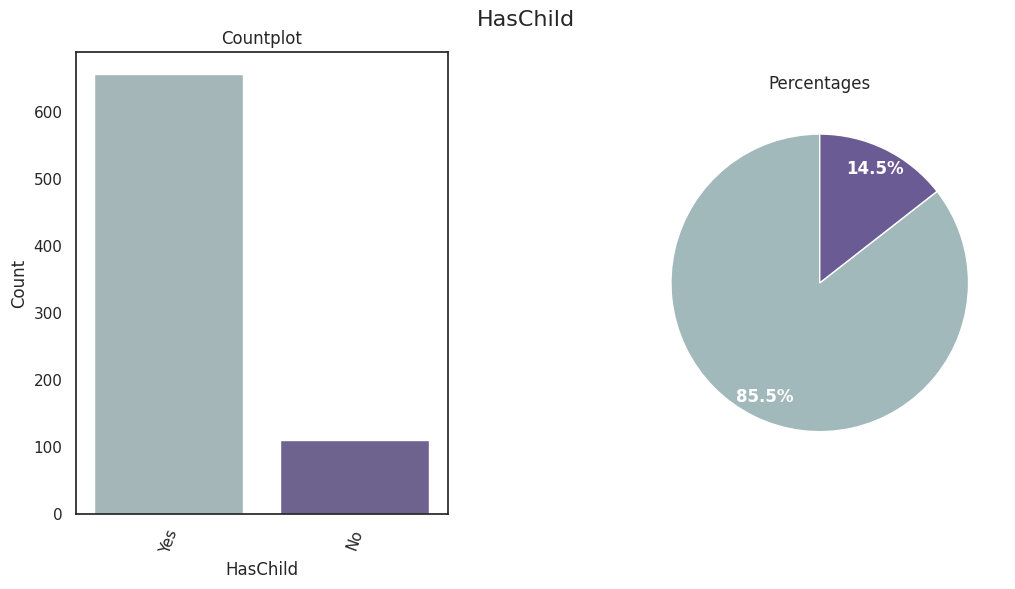

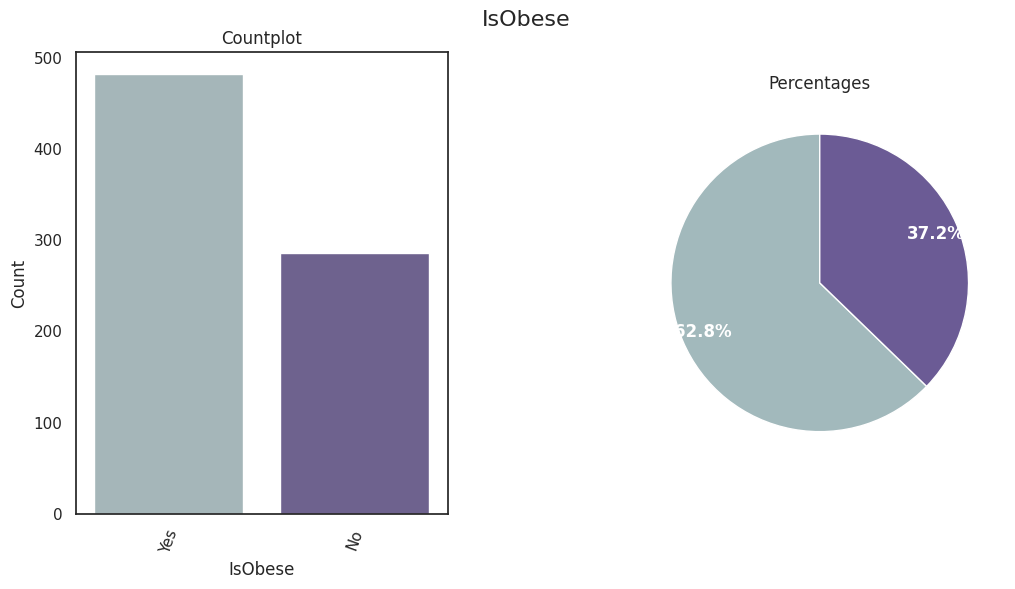

In [ ]:
for i in ["BMIClass","AgeGroup", "InsulinThreshold", "HasChild", "IsObese"]:
    cat_var_summary(df, i)

In [ ]:
cat_cols = ["BMIClass", "AgeGroup", "InsulinThreshold", "HasChild", "IsObese"]
df = pd.get_dummies(df, columns=cat_cols)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMIClass_ExtremelyObese,...,AgeGroup_LateMiddleAge,AgeGroup_MiddleAge,AgeGroup_Old,AgeGroup_Young,InsulinThreshold_Above,InsulinThreshold_Below,HasChild_No,HasChild_Yes,IsObese_No,IsObese_Yes
0,6.0,148.0,72.0,35.0,199.5,33.6,0.627,50.0,1,0,...,1,0,0,0,1,0,0,1,0,1
1,1.0,85.0,66.0,29.0,115.0,26.6,0.351,31.0,0,0,...,0,1,0,0,0,1,0,1,1,0
2,8.0,183.0,64.0,32.0,168.0,23.3,0.672,32.0,1,0,...,0,1,0,0,1,0,0,1,1,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,0,...,0,0,0,1,0,1,0,1,1,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.949,33.0,1,1,...,0,1,0,0,1,0,1,0,0,1


In [ ]:
rs = RobustScaler()
df[num_cols] = rs.fit_transform(df[num_cols])

In [ ]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

<div style="border-radius:10px;
            border : black solid;
            background-color: #5b9aa0;
            font-size:100%;
            text-align: left">
    
<h2 style='; border:0; border-radius: 15px; font-weight: bold; font-size:220%; color:white'><center> Summary </center></h2> 
    
* <b> Initially, we checked the missing values that can't be directly discerned. Then filled them with median. </b>
* <b> Created new features to increase the accuracy. </b>
* <b> Replaced outliers in accordance with a low threshold value. </b>
* <b> Scaled data and split it into test and train data. </b>    
* <b> Now, we are ready for modeling. </b>

# Models 

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def model_performance(model):
    y_pred = model.fit(X_train, y_train).predict(X_test)

    confusion = confusion_matrix(y_test, y_pred)
    tp = confusion[1,1]
    fn = confusion[1,0]
    fp = confusion[0,1]
    tn = confusion[0,0]
    accuracy = ((tp+tn)/(tp+tn+fp+fn))
    precision = (tp/(tp+fp))
    recall = (tp/(tp+fn))
    f1_score = (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    
    cmap = plt.get_cmap('Blues')
    ax1.imshow(confusion, cmap=cmap)
    ax1.set_xticks(np.arange(len(confusion)))
    ax1.set_yticks(np.arange(len(confusion)))
    ax1.set_xticklabels(["0 (pred)", "1 (pred)"])
    ax1.set_yticklabels(["0 (true)", "1 (true)"])
    ax1.set_xlabel('Predicted labels')
    ax1.set_ylabel('True labels')
    ax1.set_title("Confusion Matrix")

    metrics = ["Accuracy", "Precision", "Recall", "F1_score"]
    values = [accuracy, precision, recall, f1_score]
    colors = ['#93e4c1', '#3baea0', '#118a7e', '#1f6f78']

    ax2.barh(metrics, values, color=colors)

    for i, v in enumerate(values):
        ax2.text(v + 0.01, i, str(round(v, 4)), color='black', fontsize=12, va='center')

    ax2.set_xlim([0, 1.2])
    ax2.set_ylim([-1, 4])
    ax2.set_title("Metrics")

    fig.suptitle(model.__class__.__name__, fontsize=16, y=1.05)
    plt.subplots_adjust(wspace=0.4)

    plt.show()




In [ ]:
random_state = 42
models = [GaussianNB(), 
          DecisionTreeClassifier(random_state=random_state),
          SVC(random_state=random_state, probability=True),
          RandomForestClassifier(random_state=random_state),
          LogisticRegression(random_state=random_state),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=random_state)]


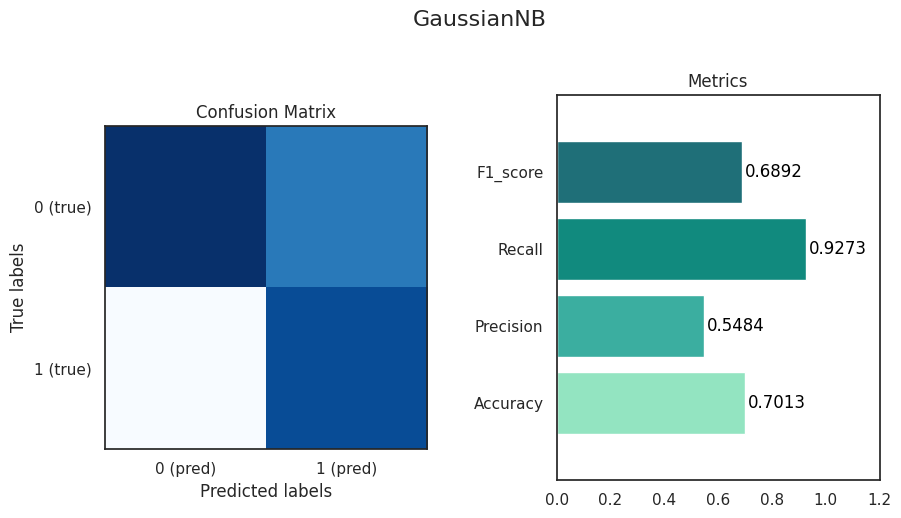

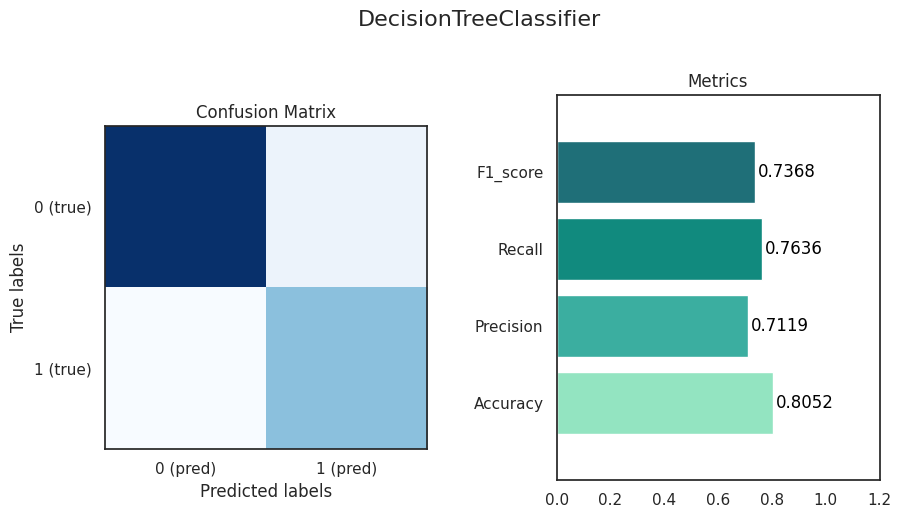

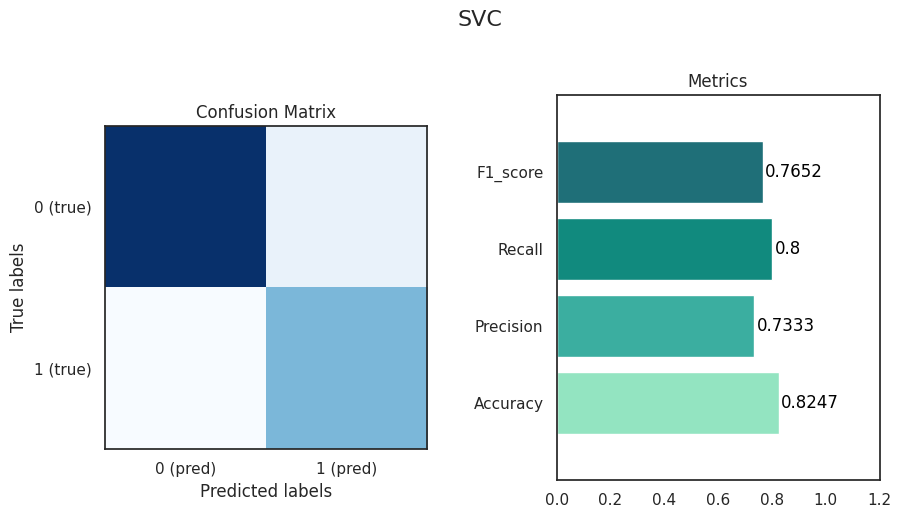

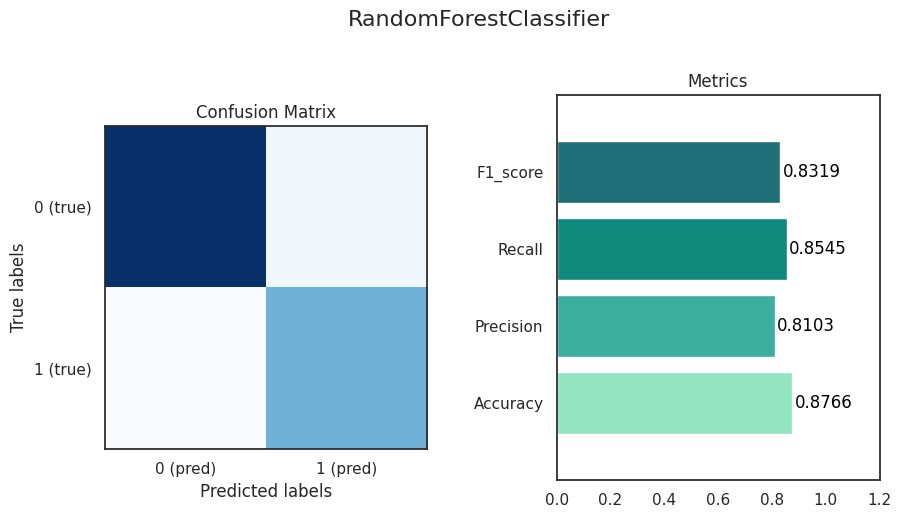

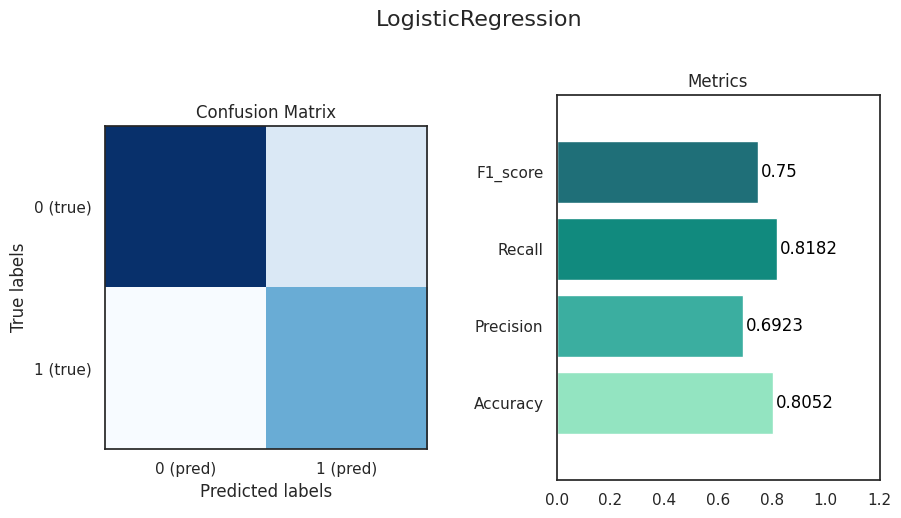

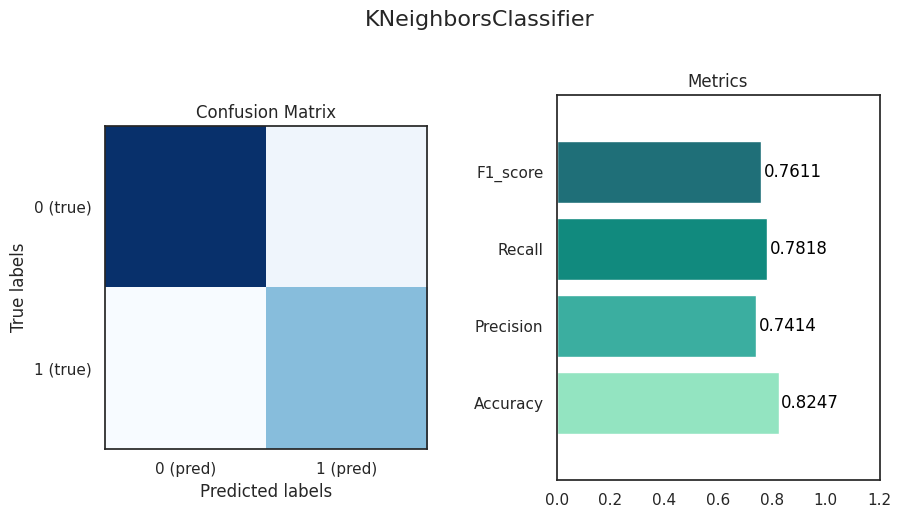

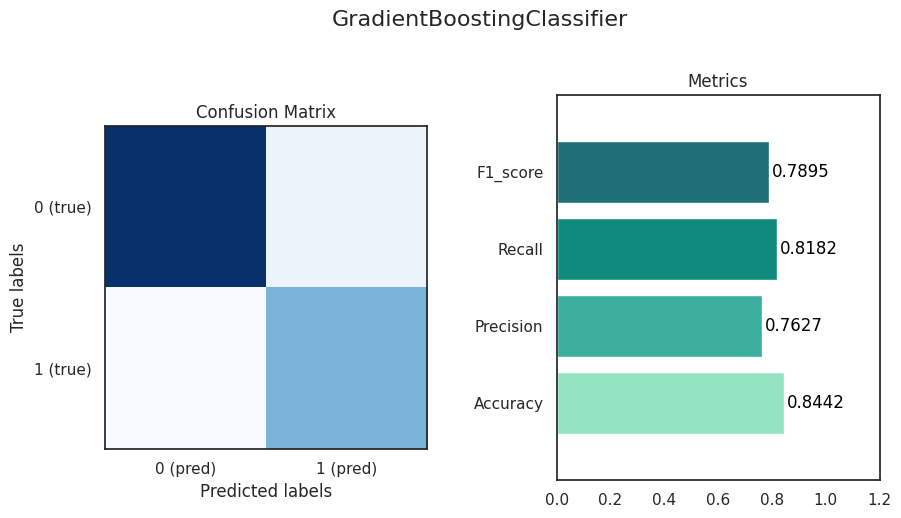

In [ ]:
for model in models:
    model_performance(model)

In [ ]:
#improving the accuracy of the decision tree model 

# define decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# define parameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}

# define grid search with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# fit grid search on training data
grid_search.fit(X_train, y_train)

# print best parameters and score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# predict on test data using best estimator from grid search
y_pred = grid_search.best_estimator_.predict(X_test)

# calculate accuracy score on test data
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score on test data:', accuracy)


Best parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}
Best score: 0.8616286818605892
Accuracy score on test data: 0.8441558441558441


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
models = {
          'GaussianNB': GaussianNB(), 
          'DecisionTreeClassifier' : DecisionTreeClassifier(random_state = random_state),
          'SVC' : SVC(random_state = random_state, probability = True),
          'RandomForestClassifier' : RandomForestClassifier(random_state = random_state),
          'LogisticRegression' : LogisticRegression(random_state = random_state),
          'KNeighborsClassifier' : KNeighborsClassifier(),
          'GradientBoostingClassifier' : GradientBoostingClassifier(random_state = random_state)
}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

GaussianNB: 70.13%
DecisionTreeClassifier: 80.52%
SVC: 82.47%
RandomForestClassifier: 87.66%
LogisticRegression: 80.52%
KNeighborsClassifier: 82.47%
GradientBoostingClassifier: 84.42%


<div style="border-radius:10px;
            border : black solid;
            background-color: #5b9aa0;
            font-size:100%;
            text-align: left">
    
<h2 style='; border:0; border-radius: 15px; font-weight: bold; font-size:220%; color:white'><center> Result </center></h2> 
    
* <b> After trying various algorithms, Random Forest gave us a roughly 88% accuracy rate. It can be increased by creating new features or adding relevant external data to the model.  </b>